![bees](bees.jpg)

# Which plants are better for bees: native or non-native?

## 📖 Background
You work for the local government environment agency and have taken on a project about creating pollinator bee-friendly spaces. You can use both native and non-native plants to create these spaces and therefore need to ensure that you use the correct plants to optimize the environment for these bees.

The team has collected data on native and non-native plants and their effects on pollinator bees. Your task will be to analyze this data and provide recommendations on which plants create an optimized environment for pollinator bees.

## 💾 The Data
You have assembled information on the plants and bees research in a file called `plants_and_bees.csv`. Each row represents a sample that was taken from a patch of land where the plant species were being studied.

| Column     | Description              |
|------------|--------------------------|
| `sample_id` | The ID number of the sample taken. |
| `species_num` | The number of different bee species in the sample. |
| `date` | Date the sample was taken. |
| `season` | Season during sample collection ("early.season" or "late.season"). |
| `site` | Name of collection site. |
| `native_or_non` | Whether the sample was from a native or non-native plant. |
| `sampling` | The sampling method. |
| `plant_species` | The name of the plant species the sample was taken from. None indicates the sample was taken from the air. |
| `time` | The time the sample was taken. |
| `bee_species` | The bee species in the sample. |
| `sex` | The gender of the bee species. |
| `specialized_on` | The plant genus the bee species preferred. |
| `parasitic` | Whether or not the bee is parasitic (0:no, 1:yes). |
| `nesting` | The bees nesting method. |
| `status` | The status of the bee species. |
| `nonnative_bee` | Whether the bee species is native or not (0:no, 1:yes). |

[Source](https://datadryad.org/stash/dataset/doi%253A10.5061%252Fdryad.pzgmsbcj8) (data has been modified)

## 💪 Challenge
Provide your agency with a report that covers the following:
* Which plants are preferred by native vs non-native bee species?
* A visualization of the distribution of bee and plant species across one of the samples.
* Select the top three plant species you would recommend to the agency to support native bees.

## 🧑‍⚖️ Judging criteria

This is a community-based competition. The top 5 most upvoted entries will win.

The winners will receive DataCamp merchandise.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your work.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.api.types import CategoricalDtype
data = pd.read_csv("data/plants_and_bees.csv")
data

,sample_id,species_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
0,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
1,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,NaN,0.0,ground,NaN,0.0
2,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
3,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena carlini,f,NaN,0.0,ground,NaN,0.0
4,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena perplexa,m,NaN,0.0,ground,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1246,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1247,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1248,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0


## We can analyze the data to determine which plant species are more frequently visited by bees. This analysis will help us identify which plant species are more attractive to bees.

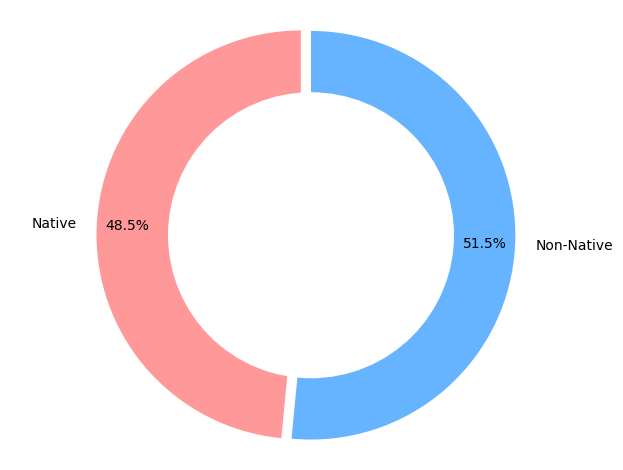

In [8]:
import matplotlib.pyplot as plt

native_counts = data[data["native_or_non"] == "native"].groupby("bee_species").size().reset_index(name="count")
total_native_bees = native_counts["count"].sum()

non_native_counts = data[data['native_or_non']== 'non-native'].groupby('bee_species').size().reset_index(name='count')
total_non_native_bees = non_native_counts['count'].sum()

total_bees = total_native_bees + total_non_native_bees

# Calculate percentages
native_percent = (total_native_bees / total_bees) * 100
non_native_percent = (total_non_native_bees / total_bees) * 100

# Create pie chart
labels = ['Native', 'Non-Native']
sizes = [native_percent, non_native_percent]
colors = ['#ff9999','#66b3ff']
explode = (0.05,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## The majority of bees consist of female bees.

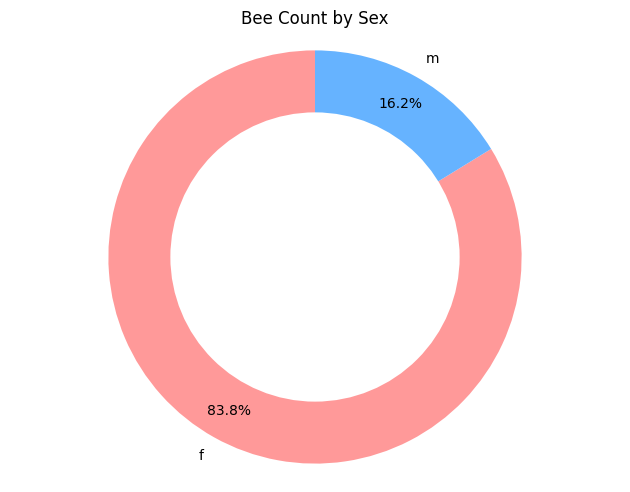

In [9]:
grouped_sex= data.groupby('sex')
sex_counts = grouped_sex.size().reset_index(name='count')

labels = sex_counts['sex']
sizes = sex_counts['count']
colors = ['#ff9999','#66b3ff']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Bee Count by Sex')
plt.show()

## This code generates a pie chart to visualize the distribution of bee counts across different seasons. Each slice of the pie represents a season, and the size of the slice corresponds to the count of bees observed in that season.

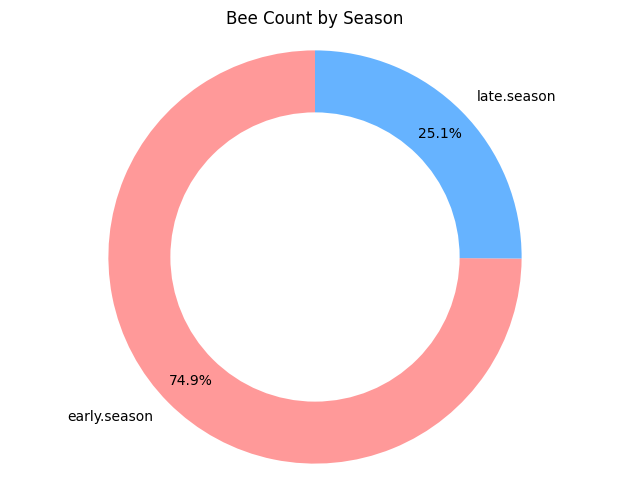

In [10]:
import matplotlib.pyplot as plt

grouped_season = data.groupby('season')
season_counts = grouped_season.size().reset_index(name='count')

labels = season_counts['season']
sizes = season_counts['count']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Bee Count by Season')
plt.show()

## In the pie chart, each slice represents a land site, and the size of the slice corresponds to the observed bee count in that site.

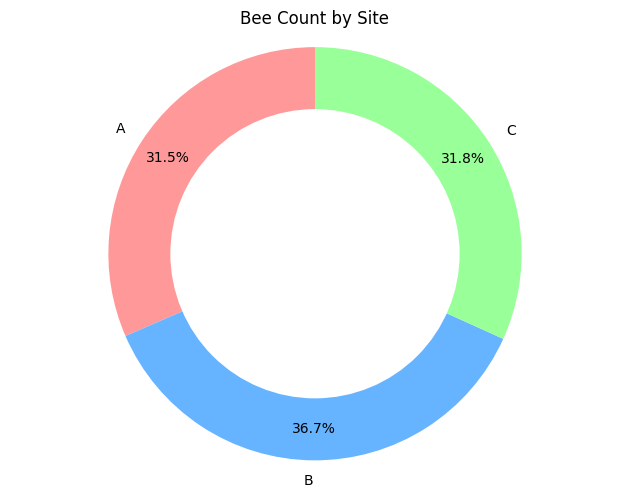

In [29]:
import matplotlib.pyplot as plt

site_count = data.groupby('site').size().reset_index(name='count')

labels = site_count['site']
sizes = site_count['count']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.title('Bee Count by Site')
plt.show()

## The chart sorts the bee species based on their counts and creates a dataset that includes only the top 13 most common species and the total count of the remaining species.

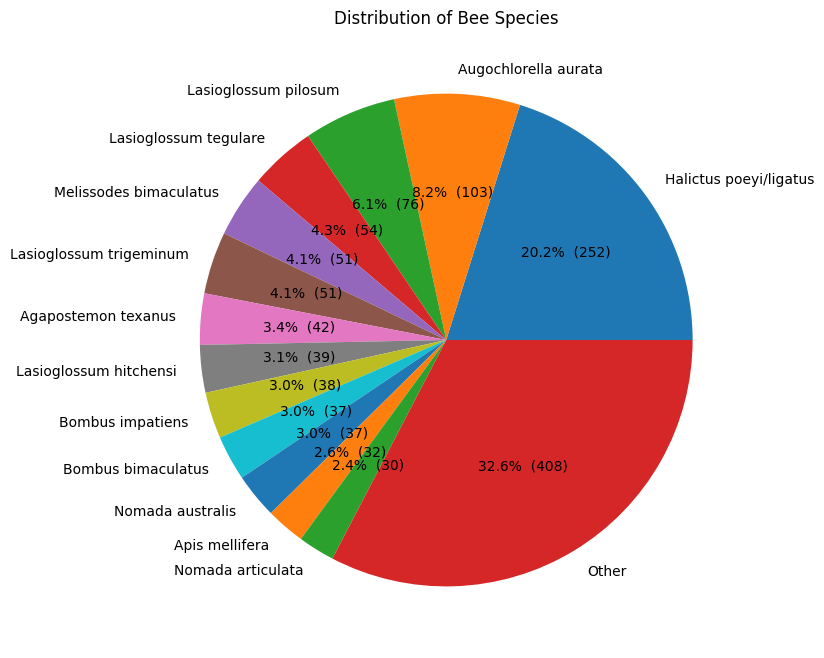

In [13]:
import matplotlib.pyplot as plt

bee_species = data.groupby('bee_species').size().reset_index(name='count')
 # drop rows with count = 1
bee_species = bee_species.sort_values(by='count', ascending=False) # sort by count in descending order
labels = bee_species['bee_species'].tolist()
counts = bee_species['count'].tolist()
other_count = sum(counts[13:])
counts = counts[:13]
labels = labels[:13]
labels.append('Other')
counts.append(other_count)

def make_autopct(counts):
    def my_autopct(pct):
        total = sum(counts)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(counts, labels=labels, autopct=make_autopct(counts))
ax.set_title('Distribution of Bee Species')
plt.show()

In [14]:
unique_bees = data['bee_species'].nunique()
print(f"There are {unique_bees} unique bee species in the dataset.")

There are 93 unique bee species in the dataset.


In [15]:
bee_counts = data.groupby('bee_species').size().reset_index(name='count')
bee_counts

,bee_species,count
0,Agapostemon sericeus,1
1,Agapostemon splendens,14
2,Agapostemon texanus,42
3,Agapostemon virescens,13
4,Andrena (Trachandrena),3
...,...,...
88,Osmia sandhouseae,1
89,Osmia subfasciata,3
90,Osmia taurus,1
91,Triepeolus lunatus,3


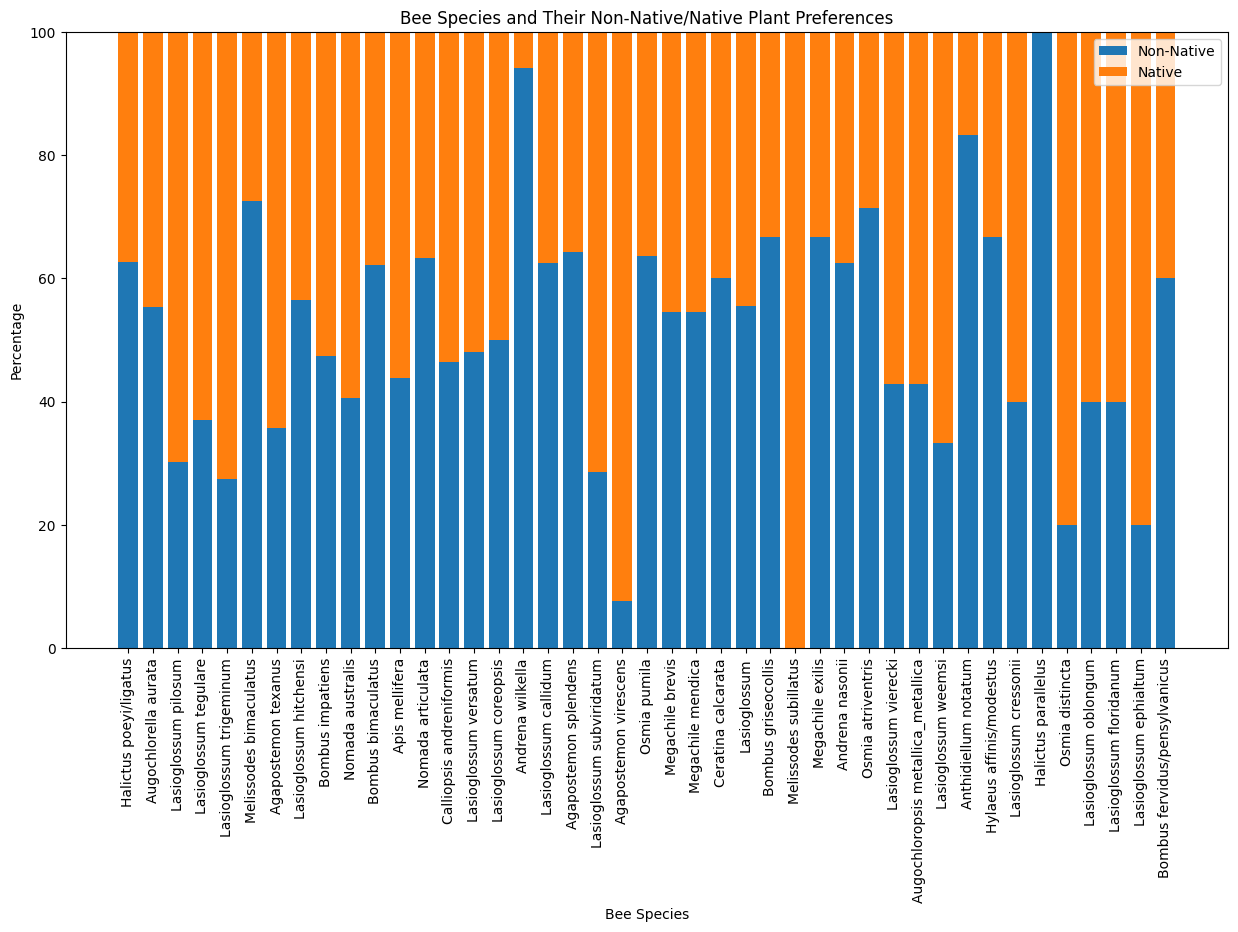

In [16]:
# Calculate the total number of bee samples
total_bee_samples = data['bee_species'].count()

# Create a dictionary to store the bee species and their corresponding percentages
bee_percentages = {}

# Calculate the percentage of each bee species in the dataset and add it to the bee_percentages dictionary
for bee in data['bee_species'].unique():
    bee_data = data[data['bee_species'] == bee]
    if bee_data.shape[0] >= 5:
        non_native_percentage = bee_data[bee_data['native_or_non'] == 'non-native'].shape[0] / bee_data.shape[0] * 100
        native_percentage = bee_data[bee_data['native_or_non'] == 'native'].shape[0] / bee_data.shape[0] * 100
        total_percentage = bee_data.shape[0] / total_bee_samples * 100
        bee_percentages[bee] = {'non_native': non_native_percentage, 'native': native_percentage, 'total': total_percentage}

# Sort the bee_percentages dictionary by total percentage in descending order
sorted_bee_percentages = sorted(bee_percentages.items(), key=lambda x: x[1]['total'], reverse=True)

# Create a bar chart to visualize the bee species and their non-native/native plant preferences
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))

bee_species = [bee[0] for bee in sorted_bee_percentages]
non_native_percentages = [bee[1]['non_native'] for bee in sorted_bee_percentages]
native_percentages = [bee[1]['native'] for bee in sorted_bee_percentages]

ax.bar(bee_species, non_native_percentages, label='Non-Native')
ax.bar(bee_species, native_percentages, bottom=non_native_percentages, label='Native')

ax.set_title('Bee Species and Their Non-Native/Native Plant Preferences')
ax.set_xlabel('Bee Species')
ax.set_ylabel('Percentage')
ax.legend()

plt.xticks(rotation=90)
plt.show()

## This visualization helps us understand the relative abundance of different bee species and their association with native or non-native plants.

1- Halictus poeyi is a bee species with 252 recorded samples. Out of these samples, 62% have visited non-native plants, while 37% have visited native plants. The proportion of this bee species among all bee species is 20.2%.

2- Augochlorella aurata is a bee species with 103 recorded samples. Among these samples, 56% have visited non-native plants, while 44% have visited native plants. The proportion of this bee species among all bee species is 8.2%.

3- Lasioglossum pilosum is a bee species with 76 recorded samples. Among these samples, 30% have visited non-native plants, while 70% have visited native plants. The proportion of this bee species among all bee species is 6.1%.

4- Lasioglossum trigeminum is a bee species with 51 recorded samples. Among these samples, 28% have visited non-native plants, while 72% have visited native plants. The proportion of this bee species among all bee species is 4.1%.

5- Lasioglossum tegulare is a bee species with 54 recorded samples. Among these samples, 38% have visited non-native plants, while 62% have visited native plants. The proportion of this bee species among all bee species is 4.3%.

6- Melissodes bimaculatus is a bee species with 51 recorded samples. Among these samples, 72% have visited non-native plants, while 28% have visited native plants. The proportion of this bee species among all bee species is 4.1%.


In [17]:
import plotly.express as px

# Create a dataframe for bee species distribution by plant species
bee_distribution = data.groupby(['native_or_non', 'bee_species']).size().reset_index(name='count')

# Calculate the percentage of each bee species for each native_or_non category
bee_distribution['percentage'] = bee_distribution.groupby('native_or_non')['count'].apply(lambda x: x / x.sum() * 100)

# Add a new column to show the count of each bee species for each native_or_non category
bee_distribution['counts'] = bee_distribution['bee_species'] + ' / count = ' + bee_distribution['count'].astype(str)

# Sort the dataframe by count in descending order
bee_distribution = bee_distribution.sort_values(by='count', ascending=False)

# Create the barplot
fig = px.bar(bee_distribution, x='percentage', y='native_or_non', color='bee_species', 
             labels={'percentage':'Percentage', 'native_or_non':'Native or Non-Native', 'bee_species':'Bee Species'},
             hover_data=['bee_species', 'counts'])

# Set the title
fig.update_layout(title='Distribution of Bee Species by Plant Species')

# Show the plot
fig.show()

# The non-native plant species most preferred by bees are

In [18]:
# Group the bee species by plant species for native plants
non_native_plants = data[data['native_or_non'] == 'non-native']
non_native_bee_species = ['Halictus poeyi/ligatus', 'Augochlorella aurata', 'Lasioglossum pilosum', 'Melissodes bimaculatus', 'Lasioglossum tegulare']
non_native_bee_distribution = non_native_plants[non_native_plants['bee_species'].isin(non_native_bee_species)].groupby(['plant_species', 'bee_species'])['bee_species'].count().reset_index(name='count')

# Create a bar plot
fig = px.bar(non_native_bee_distribution, x='count', y='plant_species', color='bee_species', orientation='h', 
             labels={'count':'Count', 'bee_species':'Bee Species', 'plant_species':'Plant Species'},
             title='Bee Species Distribution for Non-Native Plants')

# Show the plot
fig.show()

# The native plant species most preferred by bees are

In [19]:
# Group the bee species by plant species for native plants
native_plants = data[data['native_or_non'] == 'native']
native_bee_species = ['Halictus poeyi/ligatus', 'Augochlorella aurata', 'Lasioglossum pilosum', 'Lasioglossum trigeminum', 'Lasioglossum tegulare','Melissodes subillatus','Agapostemon splendens','Agapostemon virescens','Bombus impatiens']
native_bee_distribution = native_plants[native_plants['bee_species'].isin(native_bee_species)].groupby(['plant_species', 'bee_species'])['bee_species'].count().reset_index(name='count')

# Create a bar plot
fig = px.bar(native_bee_distribution, x='count', y='plant_species', color='bee_species', orientation='h', 
             labels={'count':'Count', 'bee_species':'Bee Species', 'plant_species':'Plant Species'},
             title='Bee Species Distribution for Native Plants')

# Show the plot
fig.show()

# The native plant species most visited by bees during the early and late seasons are

In [20]:
# Group the bee species by plant species for native plants and by season and sex
native_plants = data[data['native_or_non'] == 'native']
native_bee_species = ['Halictus poeyi/ligatus', 'Augochlorella aurata', 'Lasioglossum pilosum', 'Lasioglossum trigeminum', 'Lasioglossum tegulare']

# Group by plant species, season, and sex separately
native_bee_distribution_early = native_plants[native_plants['bee_species'].isin(native_bee_species) & (native_plants['season'] == 'early.season') & (native_plants['sex'] == 'f')].groupby(['plant_species', 'bee_species'])['bee_species'].count().reset_index(name='count')
native_bee_distribution_late = native_plants[native_plants['bee_species'].isin(native_bee_species) & (native_plants['season'] == 'late.season') & (native_plants['sex'] == 'f')].groupby(['plant_species', 'bee_species'])['bee_species'].count().reset_index(name='count')

# Create two bar plots
fig1 = px.bar(native_bee_distribution_early, x='count', y='plant_species', color='bee_species', orientation='h', 
             labels={'count':'Count', 'bee_species':'Bee Species', 'plant_species':'Plant Species'},
             title='Female Bee Species Distribution for Native Plants in Early Season')

fig2 = px.bar(native_bee_distribution_late, x='count', y='plant_species', color='bee_species', orientation='h', 
             labels={'count':'Count', 'bee_species':'Bee Species', 'plant_species':'Plant Species'},
             title='Female Bee Species Distribution for Native Plants in Late Season')

# Show the plots
fig1.show()
fig2.show()

# The non-native plant species most visited by bees during the early and late seasons are

In [30]:
# Group the bee species by plant species for non-native plants and by season and sex
non_native_plants = data[data['native_or_non'] == 'non-native']
non_native_bee_species = ['Halictus poeyi/ligatus', 'Augochlorella aurata', 'Lasioglossum pilosum', 'Melissodes bimaculatus', 'Lasioglossum tegulare']

# Group by plant species, season, and sex separately
non_native_bee_distribution_early = non_native_plants[non_native_plants['bee_species'].isin(non_native_bee_species) & (non_native_plants['season'] == 'early.season') & (non_native_plants['sex'] == 'f')].groupby(['plant_species', 'bee_species'])['bee_species'].count().reset_index(name='count')
non_native_bee_distribution_late = non_native_plants[non_native_plants['bee_species'].isin(non_native_bee_species) & (non_native_plants['season'] == 'late.season') & (non_native_plants['sex'] == 'f')].groupby(['plant_species', 'bee_species'])['bee_species'].count().reset_index(name='count')

# Create two bar plots
fig1 = px.bar(non_native_bee_distribution_early, x='count', y='plant_species', color='bee_species', orientation='h', 
             labels={'count':'Count', 'bee_species':'Bee Species', 'plant_species':'Plant Species'},
             title='Female Bee Species Distribution for Non-Native Plants in Early Season')

fig2 = px.bar(non_native_bee_distribution_late, x='count', y='plant_species', color='bee_species', orientation='h', 
             labels={'count':'Count', 'bee_species':'Bee Species', 'plant_species':'Plant Species'},
             title='Female Bee Species Distribution for Non-Native Plants in Late Season')

# Show the plots
fig1.show()
fig2.show()

# The distribution of the ID 17450 by plant species and bee species.

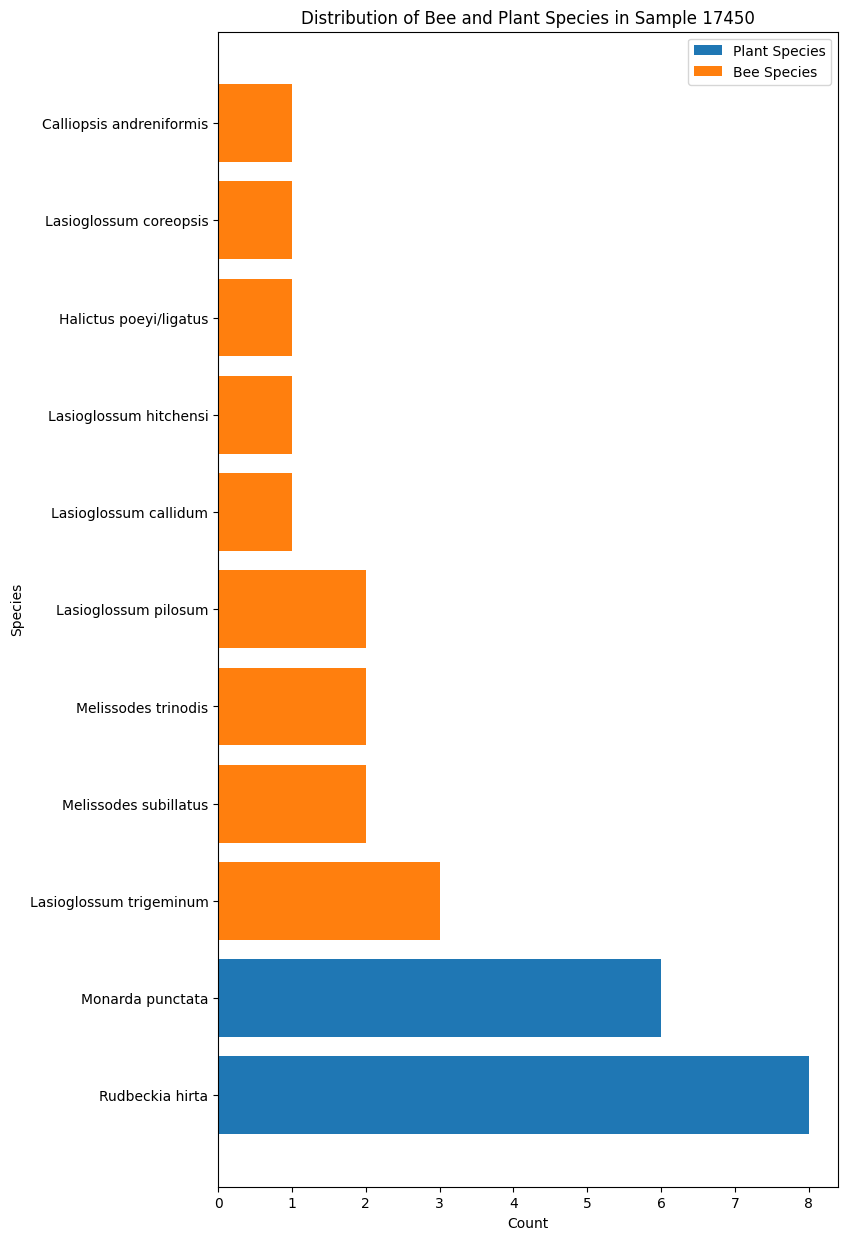

In [27]:
import matplotlib.pyplot as plt

# Select a sample
sample_id = 17450
sample_data = data[data['sample_id'] == sample_id]

# Filter out plant species with None value
sample_data = sample_data[sample_data['plant_species'].notna()]

# Count the occurrences of each plant and bee species
plant_counts = sample_data['plant_species'].value_counts()
bee_counts = sample_data['bee_species'].value_counts()

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 15))
ax.barh(plant_counts.index, plant_counts.values, label='Plant Species')
ax.barh(bee_counts.index, bee_counts.values, label='Bee Species')
ax.set_xlabel('Count')
ax.set_ylabel('Species')
ax.set_title(f'Distribution of Bee and Plant Species in Sample {sample_id}')
ax.legend()
plt.show()

# Which plant species should be promoted to support native bees?

In [28]:
# Filter out non-native bee species
native_data = data[data['native_or_non'] == 'native']

# Filter out rows with missing plant species values
native_data = native_data[native_data['plant_species'].notna()]

# Filter out rows with plant species value of 'None'
native_data = native_data[native_data['plant_species'] != 'None']

# Group by plant species and count the occurrences
plant_counts = native_data.groupby(['plant_species', 'bee_species']).size().reset_index(name='count')


# Sort the plant species by count in descending order
plant_counts = plant_counts.sort_values(by='count', ascending=False)

# Create a bar plot
fig = px.bar(plant_counts, x='plant_species', y='count', color='bee_species', 
             labels={'plant_species': 'Plant Species', 'count': 'Number of Visits', 'bee_species': 'Bee Species'},
             title='Native Plant Species with More Than 1 Visit by Native Bees')
fig.update_layout(xaxis_tickangle=-45, height=600, width=1000)
fig.show()

## 1-The graph illustrates which plant species are more frequently visited by native bees and which bee species are responsible for these visits. This helps identify the plant species that receive greater attention from native bees and therefore are important in the natural ecosystem.

### The three plant species that I would recommend for promotion are as follows:

1-Rudbeckia hirta

2-Chamaecrista fasciculata

3-Helenium flexuosum

## 2-Halictus poeyi, which is one of the species that interact with plants the most, does not solely prefer native plants. It selects non-native plants at a rate of 62%.
## 3- Melissodes subilatus visits Rudbeckia hirta, which is a native plant, at a rate of 88%. Bee species that have higher rates of visiting native plants like this can be promoted more to increase their prevalence.
